<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 18 - Custom Dataset for Images - Aladdin Persson anlattı.
</font>

**Video**:[TensorFlow Tutorial 18 - Custom Dataset for Images](https://www.youtube.com/watch?v=q7ZuZ8ZOErE&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=18)

### İçindekiler

**Structured in Subfolders**

* Method 1 - Using dataset_from_directory 
* Method 2 - Using ImageDataGenerator and flow_from_directory

**Folder with CSV File**

**All in one folder**

####  <font color="gray"> **Not:** 

* `1. model.fit(ds_train, epochs=10, verbose=2)` kodu hata verdi. </font>

Jupyter Notebookta çalıştırdım.
```
'utf-8' codec can't decode byte 0xfd in position 149: invalid start byte
```

Hatayı gideremedim.

### <font color="blue"> Giriş</font>

Custom image data seti nasıl yükleyeceğimizi öğreneceğiz bu notebookta. Bu resimleri kendimiz internetten çekmiş olabiliriz veya kendimiz oluşturmuş olabiliriz. Üç farklı yol göreceğiz. 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 1. Structured in Subfolders

Resimlerimiz farklı alt klasörlerde yer alabilir.

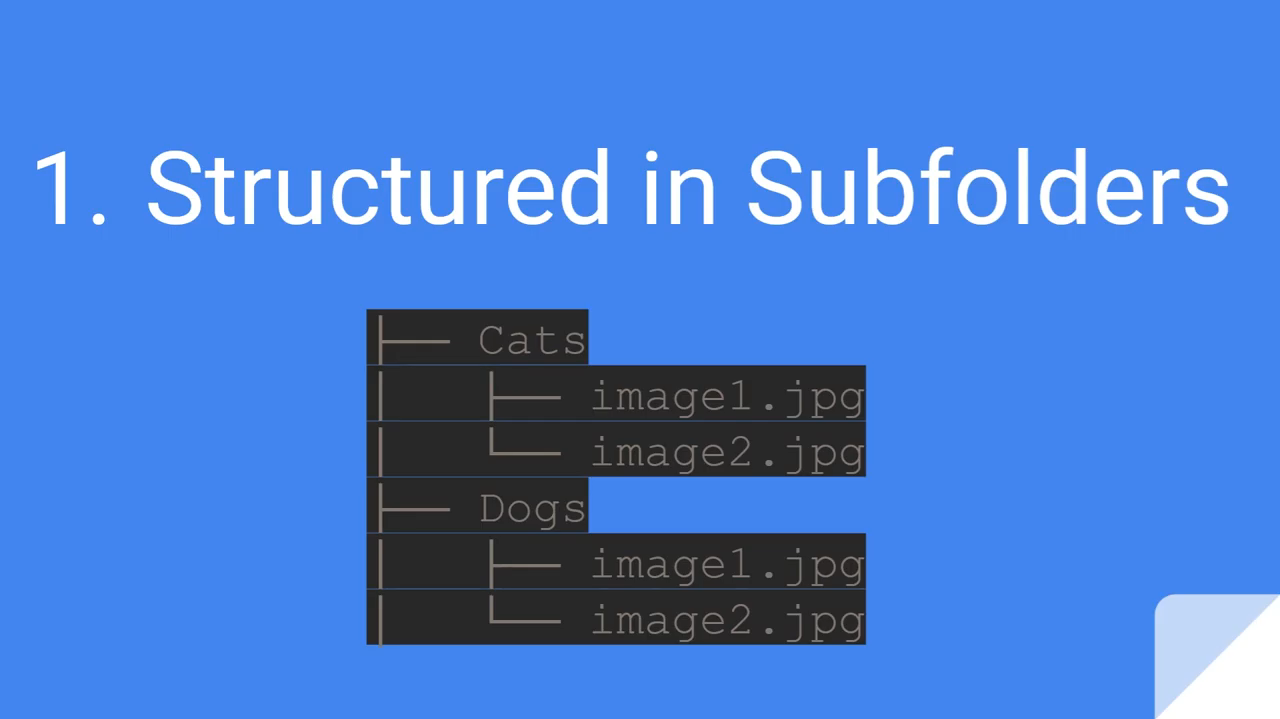

Bu datayı yüklemek için 2 farklı yol var: 
* Method 1 - Using dataset_from_directory
* Method 2 - Using ImageDataGenerator and flow_from_directory

In [2]:
img_height = 28
img_width = 28
batch_size = 2

#### <font color="blue"> Method 1 - Using dataset_from_directory </font>

Videodaki adamın datasetinde tüm rakamlar aynı klasördeydi bendekinde train ve validation diye ayrılmış. Tüm verim train klasöründeki veriymiş gibi davrandım burada.

In [18]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'data/mnist/train',  
    labels='inferred',
    label_mode = "int", # categorical, binary vs. de olabilirdi.
    color_mode = "grayscale", # rgb de olabilirdi.
    batch_size = batch_size,
    image_size = (img_height, img_width),  
    shuffle=True, # randomized order
    seed=123,
    validation_split=0.1, 
    subset="training", # bunun training seti olduğundan emin olmak için   
)

Found 31216 files belonging to 10 classes.
Using 28095 files for training.


* 'data/mnist/train' : Alt klasörlerin bulunduğu klasörü belirteceğiz.

* labels='inferred' : Bu, etiketlerin alfabetik sırayla alt klasörlerin yapısından çıkarıldığı anlamına geliyor.

* image_size = (img_height, img_width): Bu boyutta değilse reshape etmemiz gerekirdi. 

* seed=123: Bir seed belirleyebiliriz ve bu önemli. Diyelim ki datasetini bir validation setine ve bir training setine ayırıyoruz ve onu her çalıştırdığımızda tam olarak aynı training ve validation setini istiyoruz, o zaman seedi ayarlamak önemlidir.

* validation_split=0.1: Resimlerin %10'u validation olacak.


Validation seti için de aynı şeyi yapıyoruz.

In [19]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'data/mnist/train',   
    labels='inferred',
    label_mode = "int", 
    color_mode = "grayscale", 
    batch_size = batch_size,
    image_size = (img_height, img_width),  
    shuffle=True, 
    seed=123,
    validation_split=0.1,
    subset="validation", # validation olarak değiştirdik  
)

Found 31216 files belonging to 10 classes.
Using 3121 files for validation.


In [20]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

In [21]:
ds_train = ds_train.map(augment)

In [24]:
model = keras.Sequential([
    layers.InputLayer((28, 28, 1)),
    layers.Conv2D(16, 3, padding='same'),
    layers.Conv2D(32, 3, padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10)
])

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [23]:
model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10
14048/14048 - 104s - loss: 2.9779 - accuracy: 0.8717
Epoch 2/10
14048/14048 - 52s - loss: 2.8279 - accuracy: 0.9225
Epoch 3/10
14048/14048 - 62s - loss: 3.4830 - accuracy: 0.9379
Epoch 4/10
14048/14048 - 56s - loss: 4.1573 - accuracy: 0.9461
Epoch 5/10
14048/14048 - 53s - loss: 4.5861 - accuracy: 0.9549
Epoch 6/10
14048/14048 - 64s - loss: 4.8711 - accuracy: 0.9584
Epoch 7/10
14048/14048 - 65s - loss: 5.3785 - accuracy: 0.9617
Epoch 8/10
14048/14048 - 62s - loss: 5.4772 - accuracy: 0.9676
Epoch 9/10
14048/14048 - 54s - loss: 6.4907 - accuracy: 0.9683
Epoch 10/10
14048/14048 - 57s - loss: 6.5292 - accuracy: 0.9711


#### <font color="blue">Method 2 - Using ImageDataGenerator and flow_from_directory </font>

ImageDataGenerator içerisinde çok fazla data augmentation var.

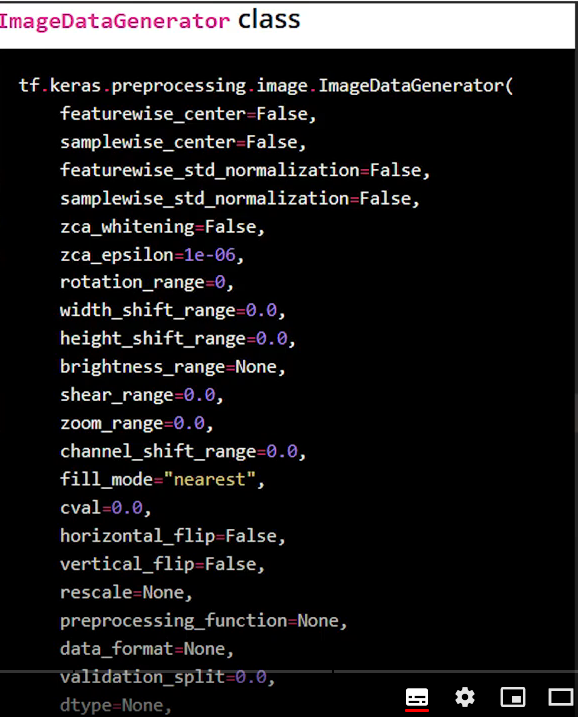

In [3]:
#image data generator

datagen = ImageDataGenerator(
    rescale=1./255, #1. float olsun diye, 255 normalize etmek için
    rotation_range=5,
    zoom_range=(0.95, 0.95), # %5 oranında uzaklaştıracak
    horizontal_flip=False, # default olarak False'lar zaten, göstermek için yazdık
    vertical_flip=False,
    data_format='channels_last', # tensorflowun standart formatı bu. you can also have channels first
    validation_split=0.0, # hiç validation ayırmadık bu sefer
    dtype=tf.float32,
)

Veriyi almak için url belirtmemiz gerekiyor, bu yüzden train_generatorı yazdık.

In [4]:
train_generator = datagen.flow_from_directory( 
    'data/mnist/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='sparse',
    shuffle=True, 
    subset='training',
) 

Found 31216 images belonging to 10 classes.


* class_mode='sparse': class_mode is going to be sparse. It is going to be sparse because we want it to be an integer representing that one. We don't want one hot encoding.

* shuffle=True: Verilerin rastgele olmasını istiyoruz.

* subset='training': Eğer validation seti ayırsaydık yukarıdaki örnekte olduğu gibi train_generator'ı kopyalar bir validation_generator oluştururduk, subset kısmına da validation adını verirdik.

Eğer training ve validationın klasörleri farklı olsaydı `'data/mnist/train'` yerine validationın uzantısını vermemiz gerekirdi.

Perhaps you don't want to do data augmentation (for validation) so you would have to then also specify a new data generator. 

In [ ]:
model = keras.Sequential([
    layers.InputLayer((28, 28, 1)),
    layers.Conv2D(16, 3, padding='same'),
    layers.Conv2D(32, 3, padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10)
])

##### <font color="green"> model.fit()'i custom olarak yazarsak</font>

In [ ]:
def training(): # you could specify one sort of one training step 
    pass

In [ ]:
# Custom Loops

for epoch in range(10):
    num_batches = 0 # batchleri sayacağız. 
    
    for x, y in ds_train:
        num_batches +=1 # we're gonna iterate up the number of batches by one, so we've now gone through one more batch
        
        # do training
        training()
        
        if num_batches==25: # len(train_dataset) / batch_size
            break

* `if num_batches==15608`: len(train_dataset) / batch_size

Videodaki örnekte train_datasetin boyutu 50 olduğu için 50/2=25 yazmıştı bu kısma.

So if that's the case then we've now gone through the entire data set and we need to break. And the reason we need to break is because we have a generator object that's going to go on forever if we don't break. 

##### <font color="green"> model.fit()'i custom olarak yazmazsak</font>

Bunu çalıştırdım.

In [9]:
# Redo model.compile to reset the optimizer states
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [11]:
model.fit(train_generator, 
          epochs=10, 
          steps_per_epoch=15608, # yukarıda belirttiğimiz num_batches
          verbose=2
          # if we had a validation generator:
          #validation_data=validation_generator,
          #validation_steps=len(validation_set)/batch_size 
         )

Epoch 1/10
15608/15608 - 68s - loss: 0.2021 - accuracy: 0.9399
Epoch 2/10
15608/15608 - 74s - loss: 0.1258 - accuracy: 0.9622
Epoch 3/10
15608/15608 - 60s - loss: 0.1058 - accuracy: 0.9686
Epoch 4/10
15608/15608 - 59s - loss: 0.0979 - accuracy: 0.9716
Epoch 5/10
15608/15608 - 56s - loss: 0.0908 - accuracy: 0.9733
Epoch 6/10
15608/15608 - 58s - loss: 0.0867 - accuracy: 0.9744
Epoch 7/10
15608/15608 - 61s - loss: 0.0824 - accuracy: 0.9755
Epoch 8/10
15608/15608 - 60s - loss: 0.0780 - accuracy: 0.9782
Epoch 9/10
15608/15608 - 57s - loss: 0.0755 - accuracy: 0.9784
Epoch 10/10
15608/15608 - 53s - loss: 0.0724 - accuracy: 0.9792


### 2. Folder with CSV File

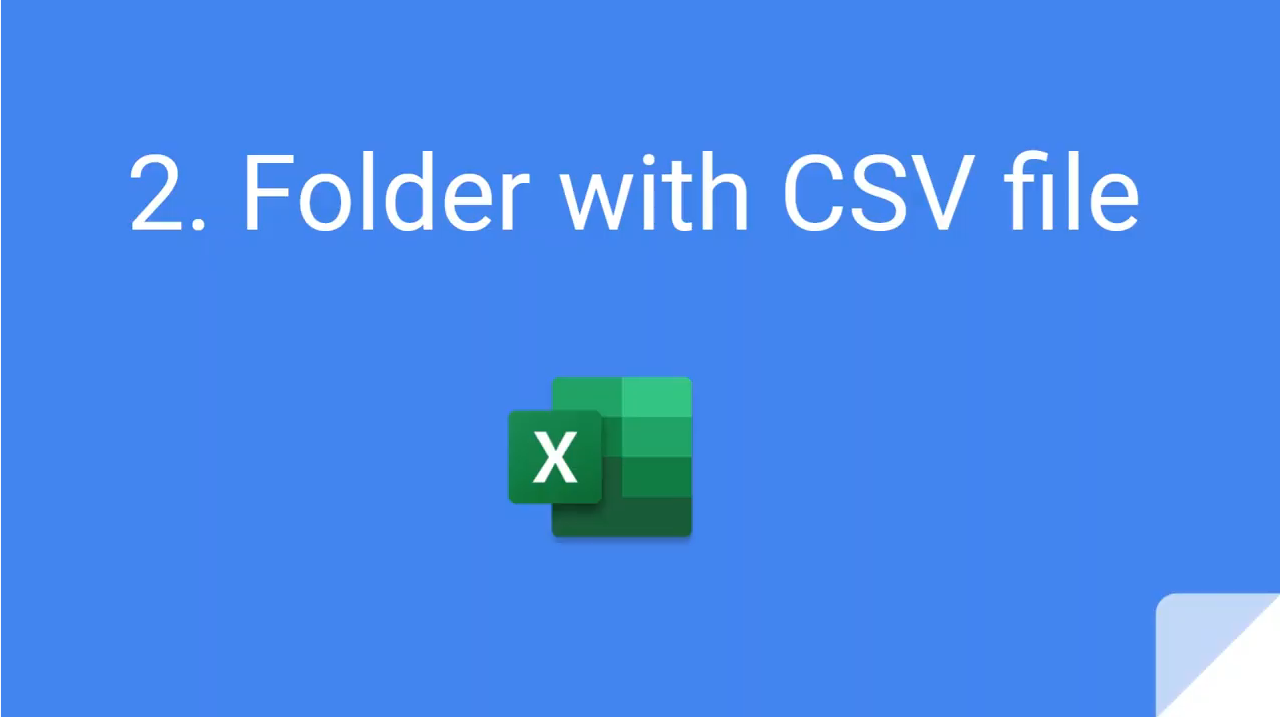

Csv dosyasının içinde resimlerin adları ve labelları var. 

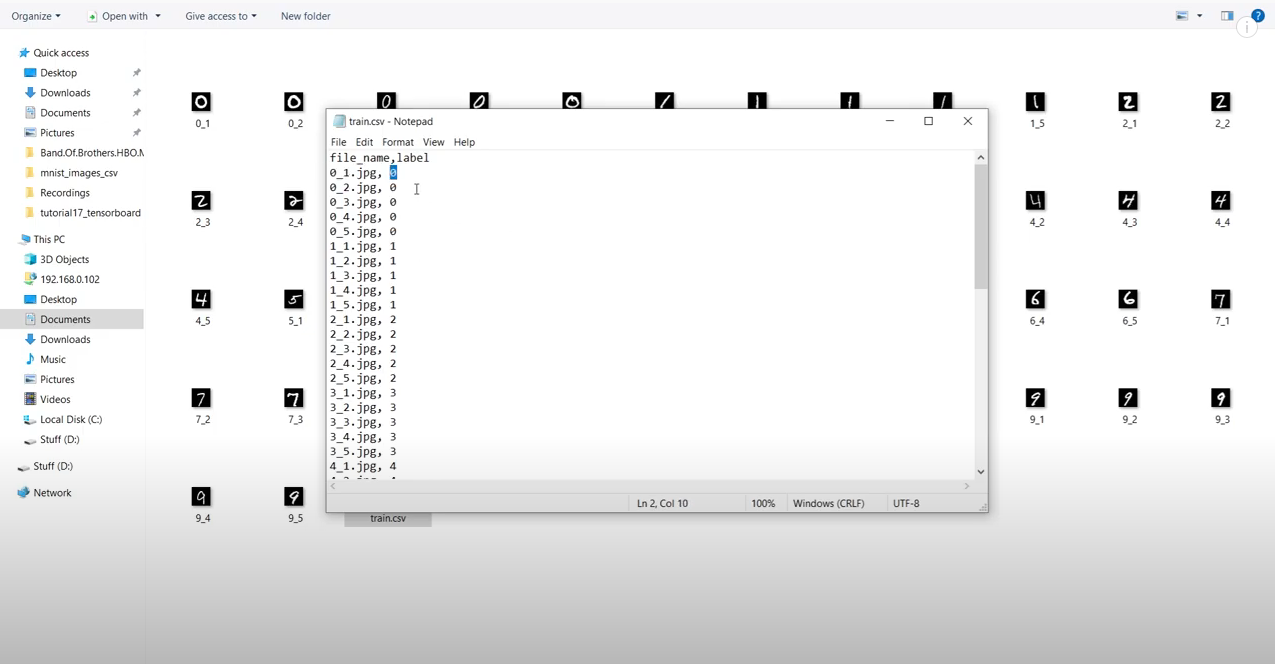

In [10]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
directory = "data/mnist_images_csv/"

In [110]:
df = pd.read_csv((directory+'train.csv'))

In [111]:
df.head()

,file_name,label
0,0_1.jpg,0
1,0_2.jpg,0
2,0_3.jpg,0
3,0_4.jpg,0
4,0_5.jpg,0


In [112]:
file_paths = df['file_name'].values # bu bize tüm dosyaların adlarını liste olarak verecek
labels = df['label'].values

In [113]:
print(file_paths)

['0_1.jpg' '0_2.jpg' '0_3.jpg' '0_4.jpg' '0_5.jpg' '1_1.jpg' '1_2.jpg'
 '1_3.jpg' '1_4.jpg' '1_5.jpg' '2_1.jpg' '2_2.jpg' '2_3.jpg' '2_4.jpg'
 '2_5.jpg' '3_1.jpg' '3_2.jpg' '3_3.jpg' '3_4.jpg' '3_5.jpg' '4_1.jpg'
 '4_2.jpg' '4_3.jpg' '4_4.jpg' '4_5.jpg' '5_1.jpg' '5_2.jpg' '5_3.jpg'
 '5_4.jpg' '5_5.jpg' '6_1.jpg' '6_2.jpg' '6_3.jpg' '6_4.jpg' '6_5.jpg'
 '7_1.jpg' '7_2.jpg' '7_3.jpg' '7_4.jpg' '7_5.jpg' '8_1.jpg' '8_2.jpg'
 '8_3.jpg' '8_4.jpg' '8_5.jpg' '9_1.jpg' '9_2.jpg' '9_3.jpg' '9_4.jpg'
 '9_5.jpg']


In [114]:
print(labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


In [115]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int64)

In [116]:
ds_train = tf.data.Dataset.from_tensor_slices((file_paths, labels))

Bu şekilde tüm file_name ve labellar tek tek birbirlerine karşılık geliyorlar. Pythondaki zip fonksiyonu gibi çalışıyor.

In [117]:
ds_train

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [118]:
def read_image(image_file, label):
    image = tf.io.read_file(directory + image_file)
    image = tf.image.decode_image(image, channels=1, dtype=tf.float32)
    return image, label

In [119]:
def augment(image, label):
    # data augmentation here
    return image, label

In [120]:
ds_train = ds_train.map(read_image).map(augment).batch(2)

In [121]:
ds_train

<BatchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int64)>

In [122]:
for epoch in range(10):
    for x, y in ds_train:
        # train here
        pass

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 99: invalid start byte

In [123]:
model = keras.Sequential([
    layers.InputLayer((28, 28, 1)),
    layers.Conv2D(16, 3, padding='same'),
    layers.Conv2D(32, 3, padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10)
])

In [124]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [125]:
model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 149: invalid start byte

### 3. All in one folder

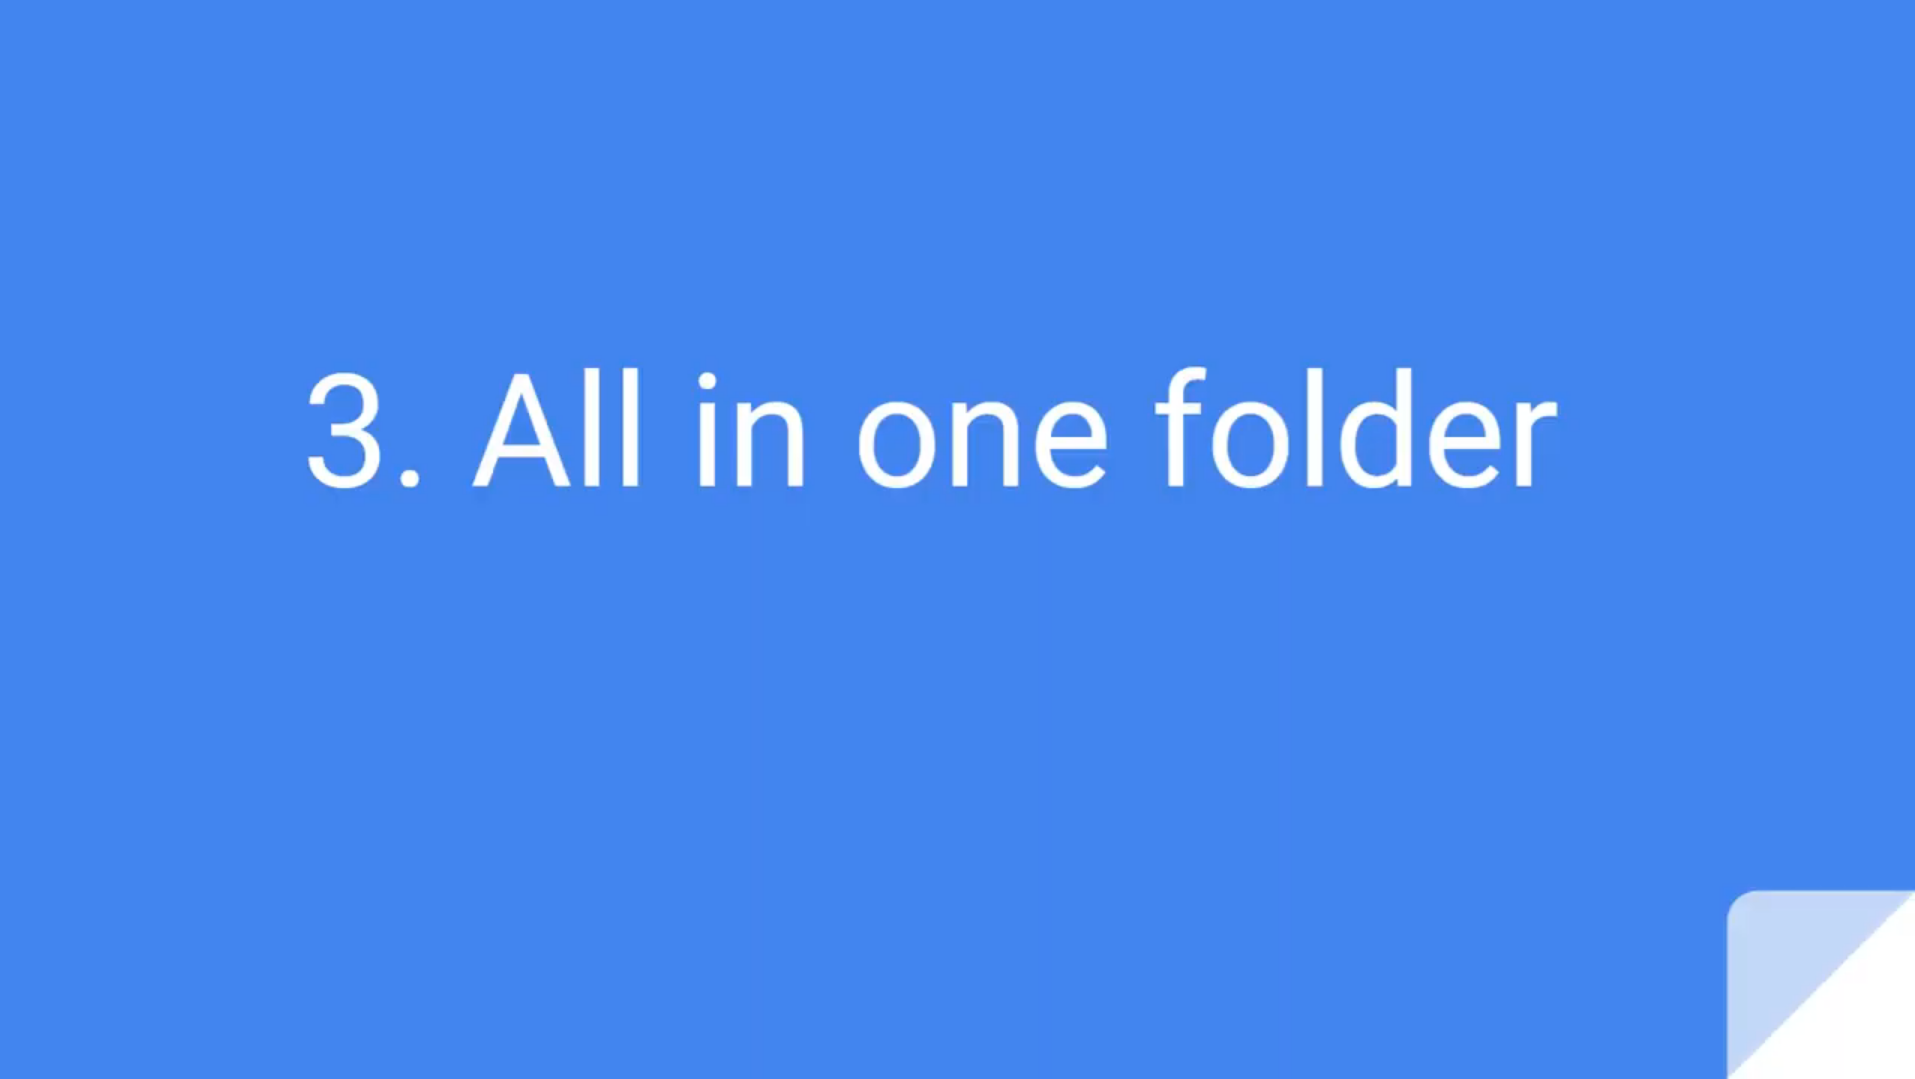

Dosyaları Aladdin Persson'un repositorysinden url'yi [buraya](https://download-directory.github.io/) yapıştırıp indirdim. 

Bizim örneğimizde resimlerin adları 0_1, 9_5, 8_2 gibi. İlk rakam resmin hangi sınıfa ait olduğu bilgisini veriyor bize. 

In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import pathlib # pathlib is in standard library

In [2]:
batch_size = 2
img_height = 28
img_width = 28

In [3]:
directory = 'data/mnist_images_only/'
ds_train = tf.data.Dataset.list_files(str(pathlib.Path(directory+'*.jpg'))) 

`ds_train = tf.data.Dataset.list_files(str(pathlib.Path(directory+'*.jpg')))` 

* list_files pathlib formatında bir şey bekliyor.
* *.jpg bu uzantıdaki tüm dosyaların alınmasını sağlayacak. 

In [4]:
for filepath in ds_train:
    print(tf.strings.split(filepath, '\\'))

tf.Tensor([b'data' b'mnist_images_only' b'1_5.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'7_2.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'1_2.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'9_1.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'8_4.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'5_3.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'8_3.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'7_3.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'6_2.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'9_5.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'2_2.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'4_2.jpg'], shape=(3,), dtype=string)
tf.Tensor([b'data' b'mnist_images_only' b'0_4.jpg'],

Yukarıdaki kod her bir klasörün adını ayrı ayrı yazmış oldu. Biz 2. indeksteki bilgiyi alacağız. '8_3.jpg' bilgisini veriyor bize bu kod.

In [5]:
for filepath in ds_train:
    print(tf.strings.split(filepath, '\\')[2])

tf.Tensor(b'8_3.jpg', shape=(), dtype=string)
tf.Tensor(b'0_4.jpg', shape=(), dtype=string)
tf.Tensor(b'9_2.jpg', shape=(), dtype=string)
tf.Tensor(b'7_1.jpg', shape=(), dtype=string)
tf.Tensor(b'0_5.jpg', shape=(), dtype=string)
tf.Tensor(b'7_4.jpg', shape=(), dtype=string)
tf.Tensor(b'0_3.jpg', shape=(), dtype=string)
tf.Tensor(b'4_2.jpg', shape=(), dtype=string)
tf.Tensor(b'6_4.jpg', shape=(), dtype=string)
tf.Tensor(b'3_2.jpg', shape=(), dtype=string)
tf.Tensor(b'4_4.jpg', shape=(), dtype=string)
tf.Tensor(b'0_2.jpg', shape=(), dtype=string)
tf.Tensor(b'7_3.jpg', shape=(), dtype=string)
tf.Tensor(b'6_1.jpg', shape=(), dtype=string)
tf.Tensor(b'1_1.jpg', shape=(), dtype=string)
tf.Tensor(b'9_1.jpg', shape=(), dtype=string)
tf.Tensor(b'5_1.jpg', shape=(), dtype=string)
tf.Tensor(b'2_3.jpg', shape=(), dtype=string)
tf.Tensor(b'0_1.jpg', shape=(), dtype=string)
tf.Tensor(b'8_2.jpg', shape=(), dtype=string)
tf.Tensor(b'8_1.jpg', shape=(), dtype=string)
tf.Tensor(b'1_4.jpg', shape=(), dt

'8_3.jpg' içerisinde ilk rakam bizim labelımızı belirttiği için ona göre kod yazacağız. Bu her data setinde farklılık gösterir. 

In [4]:
def process_path(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=1) # jpeg olduğu için resimler
    label = tf.strings.split(file_path,'\\')
    label = tf.strings.substr(label, pos=0, len=1)[2]
    label = tf.strings.to_number(label, out_type=tf.int32)
    return image, label

In [5]:
ds_train = ds_train.map(process_path).batch(batch_size)

In [8]:
model = keras.Sequential([
    layers.InputLayer((28, 28, 1)),
    layers.Conv2D(16, 3, padding='same'),
    layers.Conv2D(32, 3, padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10)
])

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [10]:
model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10
25/25 - 0s - loss: 76.8781 - accuracy: 0.2800
Epoch 2/10
25/25 - 0s - loss: 10.2779 - accuracy: 0.7000
Epoch 3/10
25/25 - 0s - loss: 3.6936 - accuracy: 0.9600
Epoch 4/10
25/25 - 0s - loss: 3.0522e-05 - accuracy: 1.0000
Epoch 5/10
25/25 - 0s - loss: 1.8960e-04 - accuracy: 1.0000
Epoch 6/10
25/25 - 0s - loss: 1.0658e-05 - accuracy: 1.0000
Epoch 7/10
25/25 - 0s - loss: 8.6152e-06 - accuracy: 1.0000
Epoch 8/10
25/25 - 0s - loss: 7.4544e-06 - accuracy: 1.0000
Epoch 9/10
25/25 - 0s - loss: 7.2327e-06 - accuracy: 1.0000
Epoch 10/10
25/25 - 0s - loss: 5.9289e-06 - accuracy: 1.0000
